# Darmstadt/Frankfurt Weather

What is the most rainy month in Darsmtadt? And the day with more rainy days? Which was the darkest month in the recent history of Darmstadt?

**Source:**

Deutscher Wetterdients Climate Data Center https://cdc.dwd.de


**Dataset:**

Historical and recent daily station observations
Station 01420 (Frankfurt)

ftp://ftp-cdc.dwd.de/pub/CDC/observations_germany/daily/
produkt_klima_tag_19490101_20161231_01420.txt
produkt_klima_tag_20160702_20180102_01420.txt


**Time range:**

From 1949 to 2017


**Remarks:**

Data from Frankfurt station. Darmstadt one has no sunshine statistics

In [1]:
import pandas as pd
import numpy as np

%matplotlib inline  

# Data import and pre-processing

In [2]:
# Frankfurt station file
# Cannot read zip file from FTP from read_csv directly beacuse multiple files contained in single zip

# Read historical data 
w_hist=pd.read_csv("produkt_klima_tag_19490101_20161231_01420.txt",
                   sep=';', 
                   skipinitialspace=True,
                   na_values=-999,
                   usecols=['MESS_DATUM', 'RSK', 'SDK'],
                   index_col=['MESS_DATUM'],
                   parse_dates=True)

# Read recent data
# Preprocessed to 
w_last=pd.read_csv("produkt_klima_tag_20160702_20180102_01420.txt",
                   sep=';',
                   skipinitialspace=True,
                   na_values=-999,
                   usecols=['MESS_DATUM', 'RSK', 'SDK'],
                   index_col=['MESS_DATUM'],
                   parse_dates=True)

# Combine both files
# Duplicated data automatically removed as they shared same index
w=w_hist.combine_first(w_last)

# Select time range period
# Remove periods without sun statistics and 2018 data
w=w['19520101':'20171231']

# Sun hours

### Darkest month in records

In [3]:
# Aggregate by month and year and sum it to get sum of Sun hours for each month
sun_month = w.groupby([w.index.year,w.index.month]).sum()

# Sort out to find the darkest months in the dataset
a = sun_month.sort_values(by='SDK')

# Show top ten darkest months
a['SDK'][:10]

MESS_DATUM  MESS_DATUM
1969        1             10.500
1958        11            11.000
1970        1             11.400
1965        12            16.800
2017        12            17.084
1960        12            17.700
1959        12            17.900
1993        12            18.200
2014        12            18.685
2013        1             19.034
Name: SDK, dtype: float64


** Darkest month (since 1993) **

And the ** winner ** is `December 2017` 
> Electronic sun sensor started operarions in February 1993. Previous manual readings are not fully accurate.

### Darkest month evolution

TODO

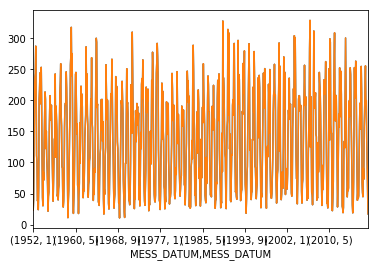

In [4]:
# Aggregate by year and sum it to get evolution over the years
sun_year = w.groupby([w.index.year]).sum()
sun_month['SDK'].plot()

# Plot total number of sun hours per year
a = sun_month['SDK']
sun_month['SDK'].plot()

# Amount of rain

### Most rainy month

In [5]:
# Aggregate by month and calculate the monthly mean
rain_month = w.groupby([w.index.month]).mean()

# Sort the monthly ranking
a = rain_month.sort_values(by='RSK', ascending=False)
a['RSK']

MESS_DATUM
6     2.171970
7     2.159629
8     2.121750
5     1.932258
11    1.780051
12    1.759971
9     1.667424
10    1.661339
4     1.450303
1     1.414712
2     1.397373
3     1.396872
Name: RSK, dtype: float64


** Most rainy month **

And the ** winner ** is `July` 



### Rainy month evolution

In [6]:
# Aggregate by month and calculate the monthly mean
rain_month = w.groupby([w.index.year, w.index.month]).mean()

# Sort the monthly ranking
a = rain_month.sort_values(by='RSK', ascending=False)

# Number of rainy days

### Month with more rainy days

In [7]:
# Transform amount of rain in binary value
# If more than 2 mm rain, then it is a rainy day
rainydays = w.copy()
rainydays[rainydays['RSK']<1.0]=0
rainydays[rainydays['RSK']>=1.0]=1

# Aggregate by month and calculate the monthly mean
rainydays_month = rainydays.groupby([rainydays.index.month]).mean()

# Sort the monthly ranking
a = rainydays_month.sort_values(by='RSK', ascending=False)
a['RSK']

MESS_DATUM
12    0.336755
6     0.319697
1     0.319159
11    0.317677
7     0.312805
5     0.308407
8     0.293255
4     0.291414
2     0.287399
10    0.285435
3     0.276149
9     0.269192
Name: RSK, dtype: float64


** Month with more rainy days **

And the ** winner ** is `December` 

